In [123]:
# IMPORT PACKAGES
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [124]:
# LOAD DATA
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [125]:
# DEFINE SIZE OF FULL BACK WIDTH, HEIGHT AND CHANNELS OF IMAGE
ful_batch, width, height, channels = train_images.shape

In [126]:
# DEFINE CLASS NAMES OF OUTPUT
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

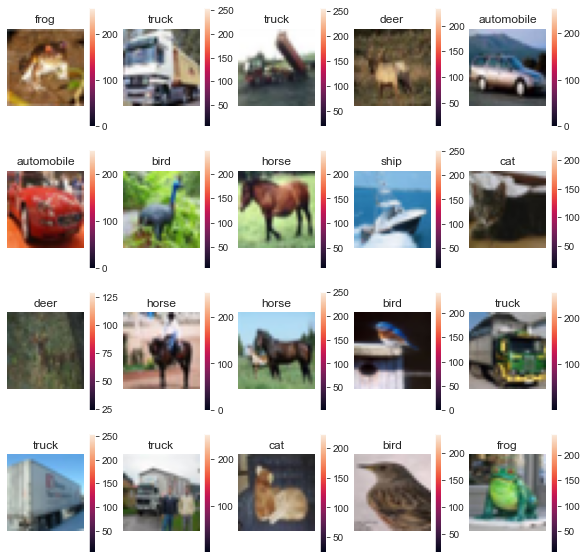

In [127]:
# PLOT 10 IMAGES
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_images[i,:,:,:])
    plt.title(class_names[train_labels[i][0]])
    plt.axis("off")
    plt.colorbar()
plt.show()

In [128]:
# NORMALIZE IMAGE TO 0 TO 1
train_images = train_images / 255
test_images = test_images / 255


In [129]:
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from tensorflow import keras


In [ ]:
# DEFINE A MODEL (CONVOLUTIONAL DEEP NEAURALL NETWORK)
model = Sequential([Conv2D(32, (3,3), padding = 'SAME', input_shape = (32,32,3), activation = 'relu'),
                   MaxPooling2D(pool_size = (2,2)),
                   Conv2D(64,(3,3), padding = "SAME", activation = 'relu'),
                   MaxPooling2D(pool_size = (2,2)),
                   Conv2D(128,(3,3), padding = "SAME", activation = 'relu'),
                   MaxPooling2D(pool_size = (2,2)),
                   Flatten(),
                   Dense(128, activation = 'relu'),
                   Dropout(0.5),
                   Dense(10, activation = 'softmax')])

In [ ]:
# SUMMARY OF MODEL
model.summary()

In [ ]:
from tensorflow.python.client import device_lib
import tensorflow as tf
print(device_lib.list_local_devices())
device_name = tf.test.gpu_device_name()
print(device_name)

In [ ]:
# SGD AND ADAM OPTIMIZER INITIALIZING
sgd = optimizers.SGD(learning_rate = 1e-3, momentum= 0.9)
adam = optimizers.Adam(learning_rate= 1e-2, beta_2=1e-5)

In [ ]:
# COMPILE MODEL WITH INITIALIZING OPTIMIZER LOSS FUNCTION AND METRICS
model.compile(optimizer = sgd, loss = keras.losses.sparse_categorical_crossentropy, metrics="accuracy")

In [ ]:
# DEFINE EARLY STOPING
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# TRAIN THE MODEL WITH GPU
with tf.device("gpu"):
    history = model.fit(train_images, train_labels, epochs=50, callbacks=early_stop, validation_split=0.2)

In [130]:
# IMPORT SEABORN AND RUN SET_STYLE TO MAKE BEAUTIFULL OUR MATPLOTLIB
import seaborn as sns
sns.set_style("darkgrid")


In [ ]:
# PLOT TRAIN LOSS AND VALIDATION LOSS
plt.figure(figsize=(10,10))
plt.plot(history.history["loss"],'b')
plt.plot(history.history["val_loss"],'r')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend(["train loss", 'validation loss'])

In [ ]:
# PLOT TRAIN ACCURACY AND VALIDATION LOSS
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"],'b')
plt.plot(history.history["val_accuracy"],'r')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train acc", 'validation acc'])

In [ ]:
# TEST OUR TRAINED MODEL ON TEST DATA
test_loss, test_accuracy = model.evaluate(test_images, test_labels)


## A complex model to show overfiting

In [131]:
# DEFINE AN COMPLEX MODEL TO SHOW OVERFITING IN PLOTS
model_ov = Sequential([Conv2D(32, (3,3), padding="SAME", input_shape=(32,32,3) , activation='relu'),
                   Conv2D(32, (3,3), padding="SAME" , activation='relu'),
                   MaxPooling2D(pool_size=(2,2)),
                   Conv2D(64, (3,3), padding="SAME", activation='relu'), 
                   MaxPooling2D(pool_size=(2,2)),
                   Conv2D(128 , (3,3), padding="SAME", activation="relu"),
                   Conv2D(128 , (3,3), padding="SAME", activation="relu"),
                   MaxPooling2D(pool_size=(2,2)),
                   Conv2D(256 , (3,3), padding="SAME", activation="relu"),
                   MaxPooling2D(pool_size=(2,2)),
                   Flatten(),
                   Dense(128, activation='relu'),
                   Dropout(0.5),
                   Dense(10,activation='softmax')])

In [132]:
model_ov.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 128)        

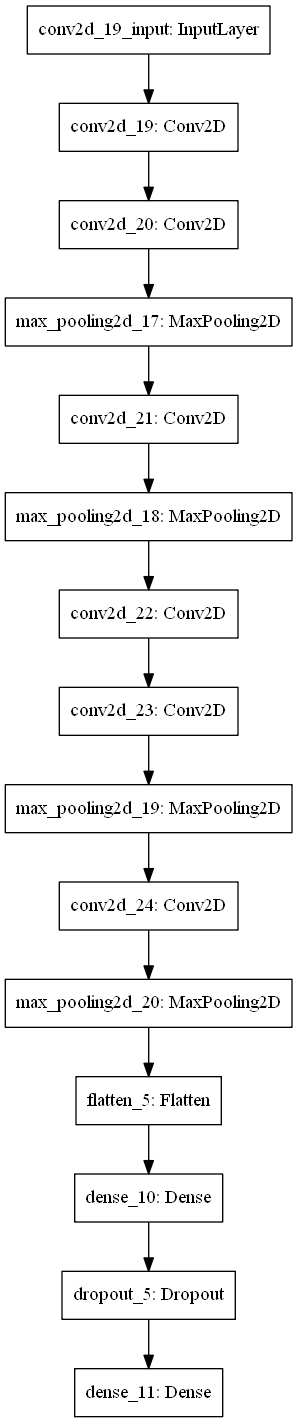

In [133]:
keras.utils.plot_model(model_ov)

In [134]:
model_ov.compile(optimizer = 'sgd', loss=keras.losses.sparse_categorical_crossentropy, metrics='accuracy')

In [135]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [136]:
with tf.device('gpu'):
    history_ov = model_ov.fit(train_images, train_labels, epochs=20, validation_split=0.2, callbacks=early_stop)

Epoch 1/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.1967 - accuracy: 0.1766 - val_loss: 1.9849 - val_accuracy: 0.2699
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.9407 - accuracy: 0.2925 - val_loss: 1.7439 - val_accuracy: 0.3783
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.7398 - accuracy: 0.3684 - val_loss: 1.5644 - val_accuracy: 0.4263
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5985 - accuracy: 0.4221 - val_loss: 1.4775 - val_accuracy: 0.4652
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5035 - accuracy: 0.4594 - val_loss: 1.4435 - val_accuracy: 0.4853
Epoch 6/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4164 - accuracy: 0.4921 - val_loss: 1.3333 - val_accuracy: 0.5159
Epoch 7/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3436 - accuracy: 0.5223 - val_loss: 1.2136 - val_ac

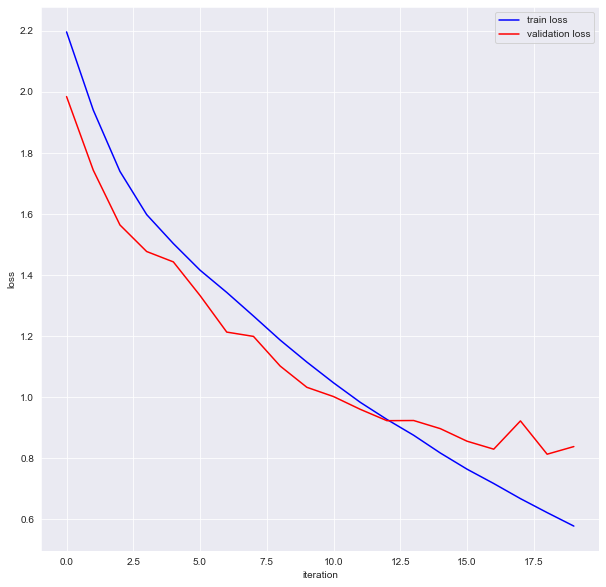

In [138]:
plt.figure(figsize=(10,10))
plt.plot(history_ov.history["loss"],'b')
plt.plot(history_ov.history["val_loss"],'r')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend(["train loss", 'validation loss'])

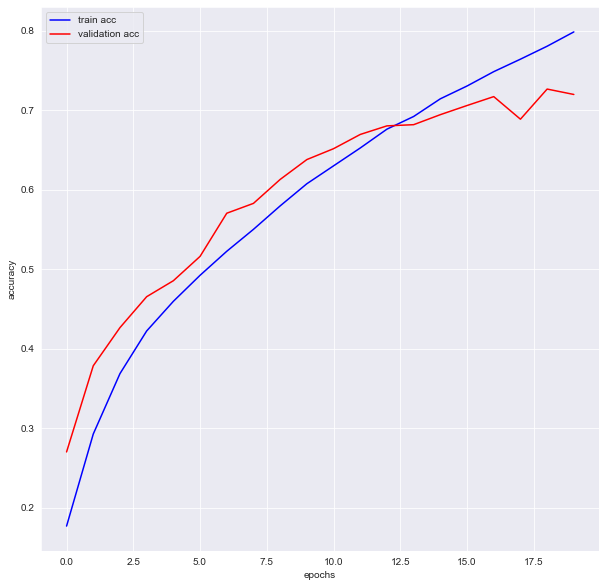

In [139]:
plt.figure(figsize=(10,10))
plt.plot(history_ov.history["accuracy"],'b')
plt.plot(history_ov.history["val_accuracy"],'r')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train acc", 'validation acc'])